# 홍대입구 - 청소년 모델 보완
## 모델 성능 높이기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hong_10 = pd.read_csv('../data/hong_10.csv')
hong_10.head()

,년,월,date,day,time,승객수,vac,일
0,2022,6,2022-06-01,3,5,46.0,0,1
1,2022,6,2022-06-01,3,6,40.0,0,1
2,2022,6,2022-06-01,3,7,40.0,0,1
3,2022,6,2022-06-01,3,8,75.0,0,1
4,2022,6,2022-06-01,3,9,246.0,0,1


In [3]:
hong_10['date'] = pd.to_datetime(hong_10['date'])
hong_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년       14620 non-null  int64         
 1   월       14620 non-null  int64         
 2   date    14620 non-null  datetime64[ns]
 3   day     14620 non-null  int64         
 4   time    14620 non-null  int64         
 5   승객수     14620 non-null  float64       
 6   vac     14620 non-null  int64         
 7   일       14620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 913.9 KB


In [4]:
hong_10['day'].unique()

array([3, 0, 1, 2])

In [12]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

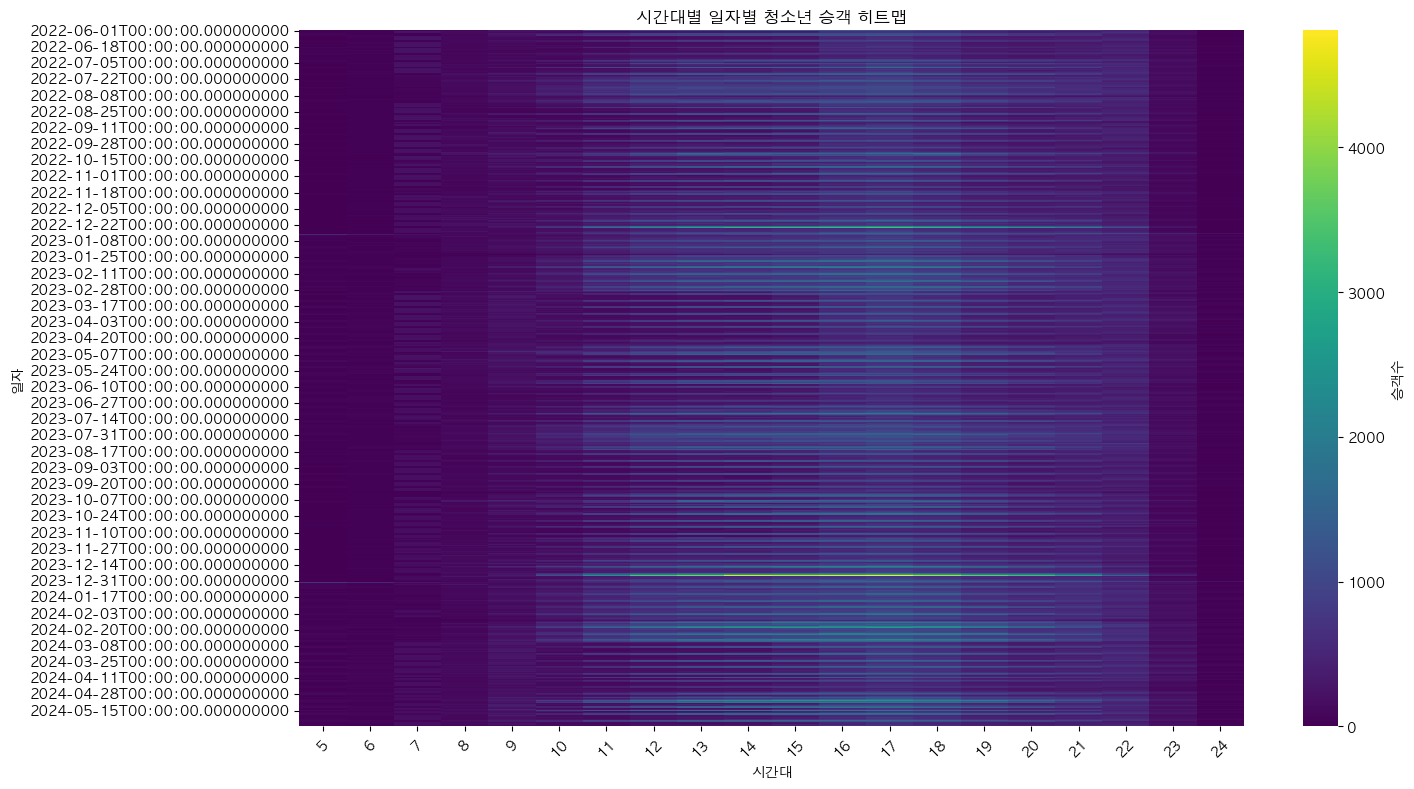

In [14]:
# 피벗 테이블 생성
pivot_table = hong_10.pivot_table(
    index='date',     
    columns='time', 
    values='승객수',
    aggfunc='sum',
)

# 히트맵 생성
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, 
            annot=False,          # 값 표시
            fmt='.0f',           # 소수점 없이 표시
            cmap='viridis',       # 색상 맵 설정
            cbar_kws={'label': '승객수'})  #

# 그래프 제목과 레이블 설정
plt.title('시간대별 일자별 청소년 승객 히트맵')
plt.xlabel('시간대')
plt.ylabel('일자')

# x축 레이블 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [11]:
hong_10.nlargest(100,'승객수')['date'].unique()

<DatetimeArray>
['2023-12-25 00:00:00', '2022-12-25 00:00:00', '2023-12-24 00:00:00',
 '2024-02-18 00:00:00', '2024-05-04 00:00:00', '2022-12-24 00:00:00',
 '2024-02-17 00:00:00', '2024-03-01 00:00:00', '2023-12-16 00:00:00',
 '2024-02-25 00:00:00', '2023-12-23 00:00:00', '2024-02-24 00:00:00',
 '2023-02-05 00:00:00', '2024-02-12 00:00:00', '2024-05-06 00:00:00',
 '2024-03-02 00:00:00', '2023-07-08 00:00:00', '2024-02-04 00:00:00',
 '2022-10-08 00:00:00', '2024-05-15 00:00:00', '2023-10-21 00:00:00']
Length: 21, dtype: datetime64[ns]

> 토, 일, 공휴일(특히 크리스마스) 이용객이 매우 많다.

In [16]:
hong_10[hong_10['date']==pd.Timestamp('2024-05-15')]

,년,월,date,day,time,승객수,vac,일
14280,2024,5,2024-05-15,3,5,107.0,0,15
14281,2024,5,2024-05-15,3,6,43.0,0,15
14282,2024,5,2024-05-15,3,7,41.0,0,15
14283,2024,5,2024-05-15,3,8,142.0,0,15
14284,2024,5,2024-05-15,3,9,309.0,0,15
14285,2024,5,2024-05-15,3,10,755.0,0,15
14286,2024,5,2024-05-15,3,11,1260.0,0,15
14287,2024,5,2024-05-15,3,12,1514.0,0,15
14288,2024,5,2024-05-15,3,13,1658.0,0,15
14289,2024,5,2024-05-15,3,14,1842.0,0,15


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

In [19]:
hong10_x = hong_10[['년','월','day','time','vac']]
hong10_y = hong_10['승객수']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    hong10_x, 
    hong10_y, 
    test_size=0.2, 
    random_state=42
)

In [28]:
# Random Forest
rf_model = RandomForestRegressor()

# Decision Tree
dt_model = DecisionTreeRegressor()

# Gradient Boosting
gb_model = GradientBoostingRegressor()

# Gaussian Process
gpr_model = GaussianProcessRegressor()

# K-Neighbors
knn_model = KNeighborsRegressor()

# Extra Trees
et_model = ExtraTreesRegressor()

In [29]:
rf_model.fit(X_train,y_train)
print('RF_Train:',rf_model.score(X_train,y_train))
print('RF_Test:',rf_model.score(X_test,y_test))

dt_model.fit(X_train, y_train)
print('DT_Train:',dt_model.score(X_train,y_train))
print('DT_Test:',dt_model.score(X_test,y_test))

gb_model.fit(X_train, y_train)
print('GB_Train:',gb_model.score(X_train,y_train))
print('GB_Test:',gb_model.score(X_test,y_test))

gpr_model.fit(X_train, y_train)
print('GPR_Train:',gpr_model.score(X_train,y_train))
print('GPR_Test:',gpr_model.score(X_test,y_test))

et_model.fit(X_train, y_train)
print('ET_Train:',et_model.score(X_train,y_train))
print('ET_Test:',et_model.score(X_test,y_test))

knn_model.fit(X_train, y_train)
print('KNN_Train:',knn_model.score(X_train,y_train))
print('KNN_Test:',knn_model.score(X_test,y_test))

RF_Train: 0.9102528985567043
RF_Test: 0.8376203660587537
DT_Train: 0.9118788029661076
DT_Test: 0.7980791958542304
GB_Train: 0.8474497761960073
GB_Test: 0.8663524035359442
GPR_Train: 0.9118788027091127
GPR_Test: 0.7945083017391643
ET_Train: 0.9118788029661076
ET_Test: 0.8005965482783313
KNN_Train: 0.8801569604277693
KNN_Test: 0.850488130638895
